<a href="https://colab.research.google.com/github/s26673/POSI_MON1/blob/main/Cwiczenia3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 3

W tych zajęciach będziemy kontynuować pracę z analizą eksploracyjną danych (EDA).

## Wprowadzenie


### Wykrywanie brakujących danych

Brakujące dane mogą występować jako NaN, puste ciągi znaków lub nawet niepoprawnie sformatowane wartości.

Możemy sprawdzić brakujące wartości w każdej kolumnie za pomocą:
```
df.isnull().sum()
```

To zwróci nam łączną liczbę brakujących wpisów w każdej kolumnie.

Możemy również zwizualizować brakujące dane za pomocą prostej mapy ciepła.
```
import matplotlib.pyplot as plt

plt.imshow(df.isnull(), aspect='auto', interpolation='nearest')
plt.title("Missing Values Heatmap (True = missing)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()
```

Interpretacja:
Jasne plamy reprezentują brakujące dane — pomaga to szybko zauważyć, które kolumny mają problemy.

### Imputacja (Wypełnianie brakujących danych)
Zamiast usuwać wiersze, możemy zastąpić brakujące dane używając:
- Średnia / Mediana → dla kolumn numerycznych
- Dominanta → dla kolumn kategorycznych
- Pusty ciąg znaków lub niestandardowa wartość → dla tekstu

```
# Example: filling missing values
df["age"] = df["age"].fillna(df["age"].median())
df["income"] = df["income"].fillna(df["income"].mean())
df["city"] = df["city"].fillna(df["city"].mode()[0])
df["notes"] = df["notes"].fillna("")
```

Wyjaśnienie:
Używamy mediany dla wieku, ponieważ jest mniej wrażliwa na wartości odstające,
średniej dla dochodu, ponieważ dobrze reprezentuje średnią,
a dominanta dla kolumn kategorycznych, takich jak miasto.


### Usuwanie brakujących danych
Czasami brakujące dane są zbyt obszerne lub istotne.
W takim przypadku możemy usunąć niekompletne wiersze za pomocą:

```
df = df.dropna(subset=["age", "income"])
```

Wyjaśnienie:  
Pozostawiamy tylko te wiersze, w których zarówno wiek, jak i dochód są obecne.


### Obsługa duplikatów
Zduplikowane wiersze mogą pojawić się podczas importowania danych z wielu źródeł.
Możemy wykryć duplikaty i je usunąć.

```
# Wykrywanie duplikatów
df.duplicated(subset=["id"])

# Usuwanie duplikatów (zostaw pierwsze wystąpienie)
df = df.drop_duplicates(subset=["id"], keep="first")
```

Wyjaśnienie:
Używamy subset=["id"], aby porównywać tylko na podstawie unikalnego identyfikatora.
Duplikaty mogą zaburzać średnie i zliczenia, dlatego ich usunięcie jest kluczowe.


### Usuwanie duplikatów  
Aby usunąć duplikaty (zachowując tylko pierwsze wystąpienie):

```
df_clean = df.drop_duplicates(subset=["id"], keep="first")

print("After removing duplicates:")
print(df_clean)
```

### Analiza jednowymiarowa/jednozmiennowa

#### Czym jest analiza jednowymiarowa?

Analiza jednowymiarowa oznacza analizę jednej zmiennej (kolumny) niezależnie, aby zrozumieć:
- Jakie wartości przyjmuje,
- Jak są rozłożone,
- Czy występują wartości odstające lub brakujące,
- Jakie wzorce lub trendy mogą istnieć.

#### Narzędzia przydatne do analizy jednowymiarowej

Dla danych numerycznych:
- Histogramy
- Wykresy pudełkowe (boxploty)
- Wykresy gęstości

Dla zmiennych kategorycznych:
- wykresy słupkowe
- tabele częstości
- wykresy kołowe

### Analiza dwuwymiarowa i wielowymiarowa

Analiza dwuwymiarowa bada zależności między dwiema zmiennymi,  
natomiast analiza wielowymiarowa analizuje jednocześnie więcej niż dwie zmienne.

Pomaga odpowiedzieć na pytania takie jak:  
- Czy wyższa opłata (fare) zwiększa prawdopodobieństwo przeżycia?  
- Jak wiek jest powiązany z opłatą?  
- Czy płeć wpływa na przeżycie?

#### Zmienna numeryczna a zmienna numeryczna  
Analizujemy, jak dwie zmienne numeryczne są ze sobą powiązane — na przykład wiek a opłata.

Wykres punktowy (Scatter Plot)
```
plt.figure(figsize=(7,5))  
sns.scatterplot(x="age", y="fare", hue="survived", data=df)  
plt.title("Wykres punktowy: Wiek a Opłata (kolorowane wg przeżycia)")  
plt.show()
```

### Mapa cieplna korelacji  
Korelacja mierzy, jak silnie zmienne poruszają się razem.
```
plt.figure(figsize=(8,6))  
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)  
plt.title("Mapa cieplna korelacji")  
plt.show()
```

Interpretacja:  
- Wartości bliskie 1 lub -1 oznaczają silne zależności.  
- Dodatnia → zmienne rosną razem.  
- Ujemna → jedna rośnie, podczas gdy druga maleje.  
- Przykład: opłata (fare) jest ujemnie skorelowana z klasą (pclass) (wyższa klasa → wyższa opłata).

## Zadanie
Twoje zadanie polega na przeprowadzeniu analizy eksploracyjnej danych (**EDA**) na zbiorze danych Titanic.

### Załaduj zbiór danych
- Załaduj zbiór danych (`titanic.csv`).

### Zrozum dane
- **Podgląd danych:** Zobacz pierwsze kilka wierszy, aby zapoznać się z danymi. Użyj metody `.head()` lub jej odpowiednika.
- **Typy danych:** Sprawdź typy danych w każdej kolumnie (np. numeryczne, kategoryczne). Użyj `.info()`, aby sprawdzić obecność brakujących wartości oraz nietypowe typy danych.
- **Sprawdzenie brakujących danych:** Zidentyfikuj kolumny zawierające brakujące dane. Omów sposób ich obsługi (np. imputacja, usuwanie wierszy/kolumn).

### Statystyki podsumowujące
- **Statystyki opisowe:** Oblicz podstawowe statystyki podsumowujące dla kolumn numerycznych (średnia, mediana, odchylenie standardowe, itp.).
- **Dane kategoryczne:** Użyj `.value_counts()`, aby zbadać częstotliwość występowania poszczególnych kategorii w kolumnach kategorycznych, takich jak 'Survived', 'Embarked', itp.

### Wizualizacja danych:

- **Analiza jednozmiennowa:**
  - Dla danych numerycznych użyj histogramów lub wykresów pudełkowych, aby zwizualizować rozkład.
  - Dla danych kategorycznych użyj wykresów słupkowych, aby pokazać częstotliwość różnych kategorii.

- **Analiza dwuzmiennowa:**
  - Zbadaj zależności między dwiema zmiennymi (np. wiek a opłata, przeżycie a płeć, itp.). Użyj wykresów punktowych, wykresów par czy macierzy korelacji.
  - Zwizualizuj wpływ cech kategorycznych (np. płeć, klasa) na zmienną docelową 'Survived'. Użyj wykresów słupkowych, wykresów skumulowanych lub wykresów słupkowych stosunkowych.

- **Macierz korelacji:** Jeśli to istotne, stwórz mapę cieplną, aby zbadać korelacje między cechami numerycznymi.

### Obsługa wartości odstających i anomalii:

- Zidentyfikuj i omów potencjalne wartości odstające lub anomalie w zbiorze danych.
- Zdecyduj, jak będziesz traktować te wartości odstające, jeśli będzie to konieczne.

### Dokumentacja wyników:
- Podsumuj kluczowe wnioski z przeprowadzonej analizy EDA, w tym zauważone wzorce lub zależności, które mogą być szczególnie ważne dla przewidywania przeżycia.
- Dostarcz wizualizacje wspierające Twoje wnioski.

### Ważne:

**Bądź szczegółowy:** Staraj się odkryć jak najwięcej informacji o danych.

**Bądź metodyczny:** Podążaj za logiczną sekwencją kroków — najpierw eksploracja, potem wizualizacja, a na końcu wnioski.

**Bądź klarowny:** Dokumentuj swoje kroki w sposób jasny, aby ktoś nieznający Twojej analizy mógł zrozumieć Twoje wnioski.


# Analiza danych Titanic (EDA)

##Załadowanie i zrozumienie danych

In [7]:
import pandas as pd
import numpy as np

# Załadowanie zbioru danych
df = pd.read_csv('titanic.csv')

print('\nPodglad pierwszych wierszy wczytanego pliku titanic.csv')
head_preview = df.head(11)
print(head_preview)

print('\nwyświetlenie informacji o danych i ich brakach:')
print(df.info())

df.isnull().sum()


Podglad pierwszych wierszy wczytanego pliku titanic.csv
    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                             

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##Sprawdzenie duplikatów, braków danych i ich wizualizacja

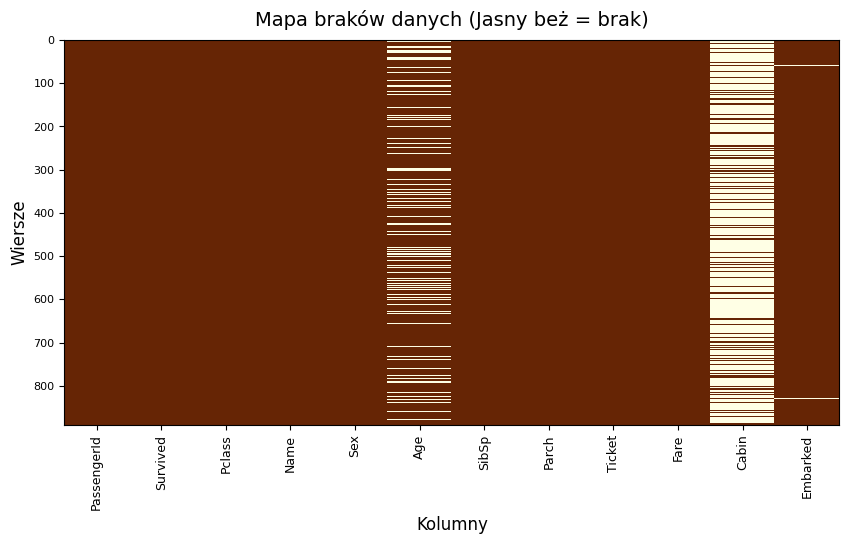

In [8]:
#mapa ciepła - wizualizacja braków danych

#każda kolumna na osi x to jedna cecha (np. age) w zbiorze danych
#każda kolumna na osi y to jeden rekord (pasazer)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.imshow(df.isnull(), aspect='auto', interpolation='nearest', cmap='YlOrBr_r')
plt.title("Mapa braków danych (Jasny beż = brak)", fontsize=14, pad=10)
plt.xlabel("Kolumny", fontsize=12)
plt.ylabel("Wiersze", fontsize=12)

plt.xticks(
    ticks=range(len(df.columns)),
    labels=df.columns,
    rotation=90,
    fontsize=9
)
plt.yticks(fontsize=8)


plt.show()

#ciemny brązowy - wartość istnieje
#jasny beżowy - wartość brakujaca (NaN)


###Interpretacja mapy:

Jasne pionowe pasy to kolumny z brakami (tu: Age, Cabin, Embarked).

Wizualizacja braków na mapie pomaga szybko zauważyć, które kolumny wymagają uzupełnienia.

In [9]:
#jaki procent stanowią zidentyfikowane brakujące wartosci w poszczególnych kolumnach?
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
pd.DataFrame({'Braki': missing, 'Procent [%]': missing_pct})

,Braki,Procent [%]
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [10]:
# czy są jakieś duplikaty?
dupes = df.duplicated().sum()
print(dupes)

0


###Podsumowanie
W tym zbiorze nie ma duplikatów (każdy pasażer to unikalny rekord).

####-> brakuje:
*   age - u 177 pasażerów
*   cabin - u 687 pasażerów (najwięcej)
*   embarked - u 2 pasażerów

Najwięcej braków występuje w Cabin, następnie w Age, pojedyncze w Embarked.

## Czyszczenie danych:

Uzasadnienie imputacji (uzupełniania braków danych) w zbiorze titanic:


---



*   kolumna **Age** jest kolumną numeryczną; występuje w niej ok. **20% brakujących wartosci**; **braki uzupełniono medianą**, ponieważ jest odporna na wartości odstające i lepiej reprezentuje typowy wiek pasażera niż średnia, zastosowanie mediany pozwala zachować wszystkie obserwacje bez zniekształcania rozkładu
*   kolumna **Embarked** jest kolumną kategoryczną (object); brakujących wartosci** jest tylko **2**; braki uzupełniono dominującą wartością (modą) - najczęstszy port
*   kolumna **Cabin** jest kolumną tekstową (object); braków jest aż **77%**; w tym przypadku zdecydowano się nie usuwać kolumny, tylko zastąpić puste wartości tekstem "Unknown" i dodać kolumnę logiczną "HasCabin", wskazujaca czy pasażer miał przypisaną kabinę czy też nie (może sam fakt posiadania lub brak kabiny jest istotny np. czy osoby z kabina miała większe szanse na przeżycie lub mozna sprawdzić ceny biletów vs numer kabiny(sektor))

In [11]:
# 1. Uzupełnienie brakujacych wartości Age medianą
df["Age"] = df["Age"].fillna(df["Age"].median())

# 2. Uzupełnienie brakujacych wartości Embarked najczęstszą wartością
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 3. Uzupełnienie brakujacych wartości Cabin ciągiem znaków "Unknown"
df["Cabin"] = df["Cabin"].fillna("Unknown")


df["HasCabin"] = df["Cabin"].apply(lambda x: 0 if x == "Unknown" else 1)
print(df.head())
# 4. ponowne sprawdzenie ew. braków
print("Pozostałe braki po czyszczeniu:")
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  HasCabin  
0      0         A/5 21171   7.2500  Unknown        S         0  
1      0          PC 17599  71.2833      C85        C         1  
2      0  STON/O2. 3101282   7.9250  Unknown        S         0  
3      0            113803  53.1000     C123        S   

Zbiór danych jest kompletny (bez braków).

## Statystyki podsumowujące

In [12]:
print('Statystyki opisowe (tylko dla kolumn numerycznych):')
df.describe().T

Statystyki opisowe (tylko dla kolumn numerycznych):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
HasCabin,891.0,0.228956,0.420397,0.00,0.0000,0.0000,0.0,1.0000


In [13]:
print('\nStatystyki dla danych kategorycznych:')
print(df.describe(include='object').T)


Statystyki dla danych kategorycznych:
         count unique                  top freq
Name       891    891  Dooley, Mr. Patrick    1
Sex        891      2                 male  577
Ticket     891    681               347082    7
Cabin      891    148              Unknown  687
Embarked   891      3                    S  646


###Analiza jednowymiarowa

####Sex

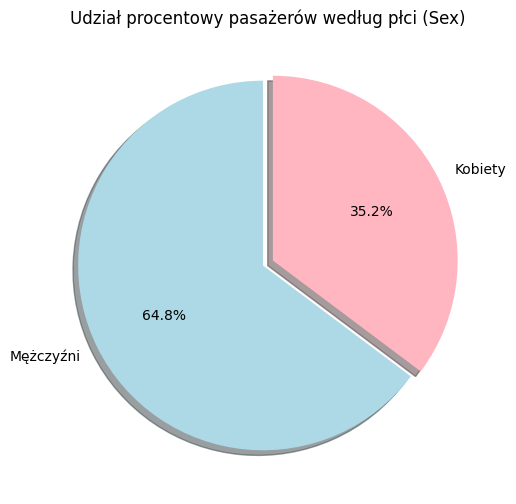

In [34]:
import matplotlib.pyplot as plt

# Zliczamy kobiety i mężczyzn
sex_counts = df["Sex"].value_counts()

# Etykiety i kolory
labels = ["Mężczyźni", "Kobiety"]
colors = ["lightblue", "lightpink"]

# Wykres kołowy
plt.figure(figsize=(6,6))
plt.pie(
    sex_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=(0.03, 0.03),
    shadow=True
)

plt.title("Udział procentowy pasażerów według płci (Sex)")
plt.show()

*   Mężczyźni stanowili ok. 65% pasażerów,
*   Kobiety ok. 35%,
czyli na pokładzie było prawie dwukrotnie więcej mężczyzn niż kobiet.

####Survived

=== Survived ===
Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    62.0
1    38.0
Name: proportion, dtype: float64


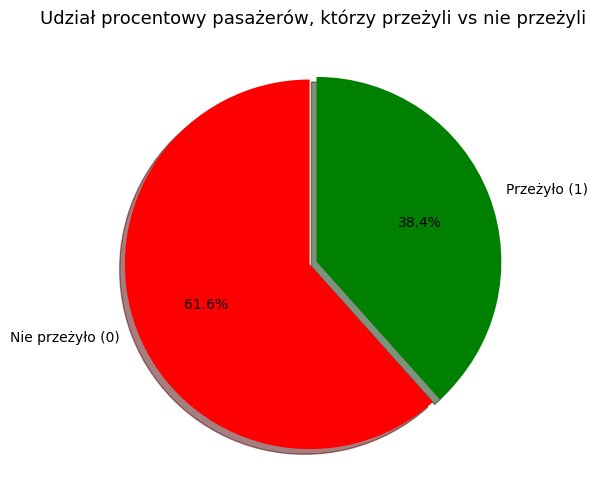

In [15]:
print("=== Survived ===")
print(df["Survived"].value_counts())
print(df["Survived"].value_counts(normalize=True).round(2)*100)

# zliczenie wartości
survived_counts = df["Survived"].value_counts()
labels = ["Nie przeżyło (0)", "Przeżyło (1)"]
colors = ["red", "green"]

# wykres kołowy
plt.figure(figsize=(6,6))
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=(0.02, 0.02), shadow=True)
plt.title("Udział procentowy pasażerów, którzy przeżyli vs nie przeżyli", fontsize=13)
plt.show()

Z wykresu wynika, że ok. 62% pasażerów zginęło, a 38% przeżyło katastrofę Titanica.

####Age

Wykres pudełkowy dla wieku


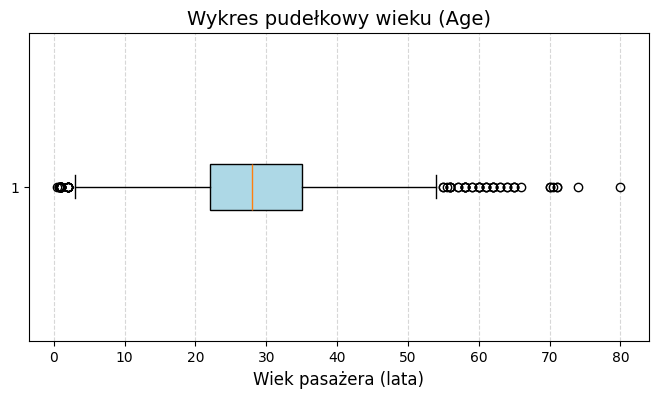

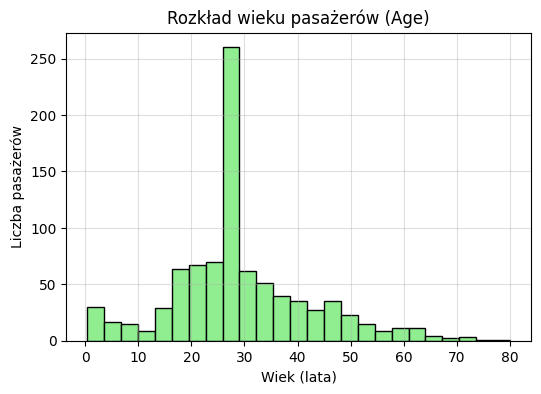

In [20]:
import matplotlib.pyplot as plt
print('Wykres pudełkowy dla wieku')

plt.figure(figsize=(8,4))
plt.boxplot(df["Age"], vert=False, patch_artist=True,boxprops=dict(facecolor="lightblue"))
plt.title("Wykres pudełkowy wieku (Age)", fontsize=14)
plt.xlabel("Wiek pasażera (lata)", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


plt.figure(figsize=(6,4))
plt.hist(df["Age"], bins=25, color="lightgreen", edgecolor="black")
plt.title("Rozkład wieku pasażerów (Age)")
plt.xlabel("Wiek (lata)")
plt.ylabel("Liczba pasażerów")
plt.grid(alpha=0.4)
plt.show()

Średni wiek pasażerów to ok.30 lat.
Widzimy szeroki rozrzut – na pokładzie były zarówno dzieci, jak i seniorzy.

####Fare

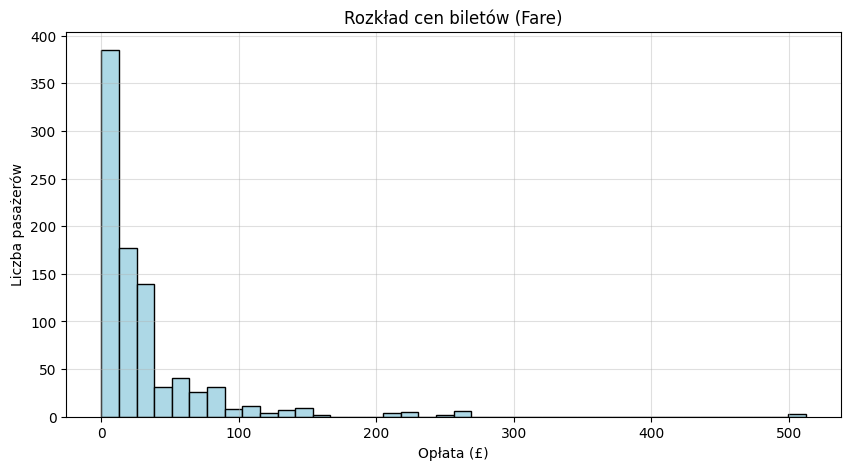

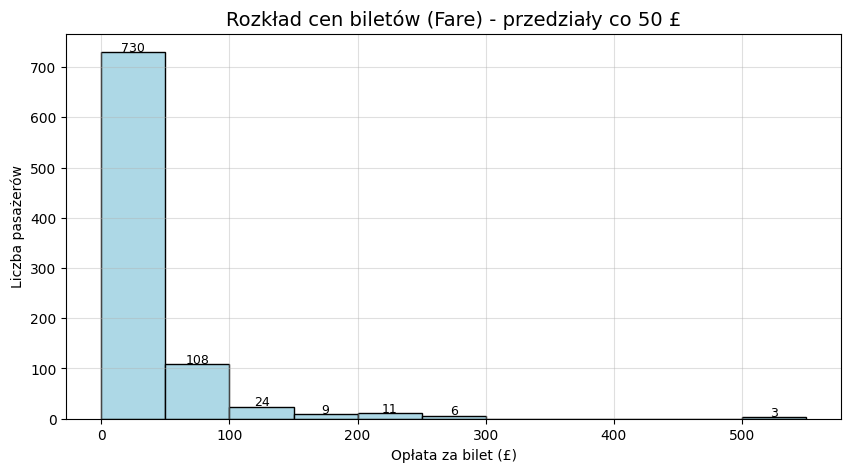

In [24]:

plt.figure(figsize=(10,5))
n, bins, _ = plt.hist(df["Fare"], bins=40, color="lightblue", edgecolor="black")
plt.title("Rozkład cen biletów (Fare)")
plt.xlabel("Opłata (£)")
plt.ylabel("Liczba pasażerów")
plt.grid(alpha=0.4)
plt.show()

#inny diagram
bins = np.arange(0, df["Fare"].max() + 50, 50)

plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(df["Fare"], bins=bins, color="lightblue", edgecolor="black")

plt.title("Rozkład cen biletów (Fare) - przedziały co 50 £", fontsize=14)
plt.xlabel("Opłata za bilet (£)")
plt.ylabel("Liczba pasażerów")
plt.grid(alpha=0.4)

# Dodanie liczby pasażerów nad każdym słupkiem
for i in range(len(n)):
    count = int(n[i])
    if count > 0:  # tylko jeśli w przedziale są pasażerowie
        # pozycja x = środek słupka
        x_pos = (bins[i] + bins[i+1]) / 2
        plt.text(x_pos, n[i] + 2, str(count), ha="center", fontsize=9)

plt.show()

Większość pasażerów zapłaciła poniżej 50 funtów.
Rozkład jest prawoskośny – kilka bardzo drogich biletów podnosi średnią.


wizualizacja rozkładu opłat za bilet


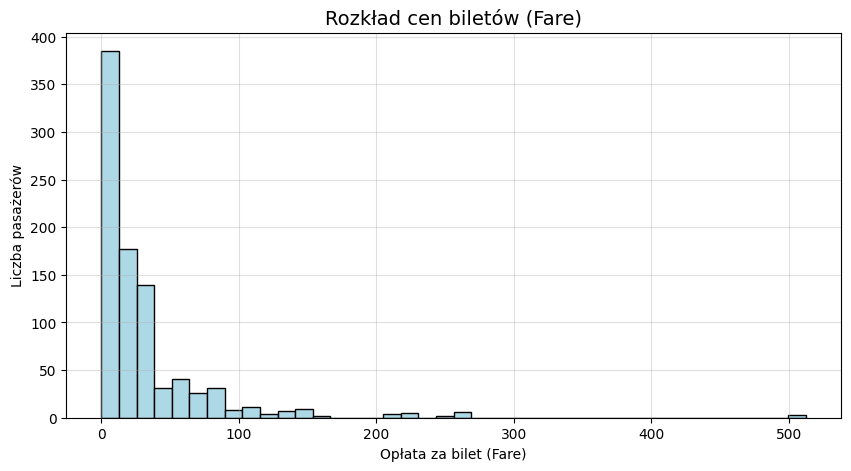

0 – 13 £ : 385 pasażerów
13 – 26 £ : 177 pasażerów
26 – 38 £ : 139 pasażerów
38 – 51 £ : 31 pasażerów
51 – 64 £ : 41 pasażerów
64 – 77 £ : 26 pasażerów
77 – 90 £ : 31 pasażerów
90 – 102 £ : 8 pasażerów
102 – 115 £ : 11 pasażerów
115 – 128 £ : 4 pasażerów
128 – 141 £ : 7 pasażerów
141 – 154 £ : 9 pasażerów
154 – 167 £ : 2 pasażerów
205 – 218 £ : 4 pasażerów
218 – 231 £ : 5 pasażerów
243 – 256 £ : 2 pasażerów
256 – 269 £ : 6 pasażerów
500 – 512 £ : 3 pasażerów


In [ ]:
print('wizualizacja rozkładu opłat za bilet')
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
n, bins, _ = plt.hist(df["Fare"], bins=40, color="lightblue", edgecolor="black")
plt.title("Rozkład cen biletów (Fare)", fontsize=14)
plt.xlabel("Opłata za bilet (Fare)")
plt.ylabel("Liczba pasażerów")
plt.grid(alpha=0.4)
plt.show()
for i in range(len(n)):
    count = int(n[i])     # liczba pasażerów
    if count > 0:         # tylko te, gdzie coś jest
        left = bins[i]       # początek przedziału
        right = bins[i+1]    # koniec przedziału
        print(f"{left:.0f} – {right:.0f} £ : {count} pasażerów")



####Pclass

Wnioski dotyczące kolumny Fare (opłata za bilet)
- Najwięcej pasażerów zapłaciło **mniej niż 50 £**.
- **Mediana (14,45 £)** jest dużo niższa od **średniej (32,20 £)** — oznacza to, że kilka bardzo drogich biletów znacząco podniosło średnią wartość.
- Rozkład Fare jest **mocno skośny w prawo**: dominują niskie ceny, ale pojawiają się rzadkie, bardzo wysokie wartości.

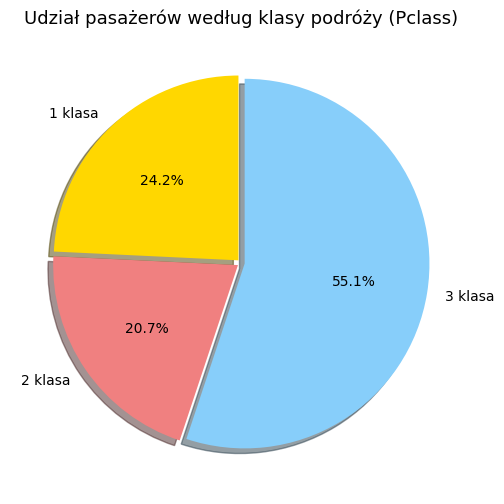

In [23]:
class_counts = df["Pclass"].value_counts().sort_index()
labels = ["1 klasa", "2 klasa", "3 klasa"]
colors = ["gold", "lightcoral", "lightskyblue"]

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=labels, autopct="%1.1f%%",
        startangle=90, colors=colors, explode=(0.02,0.02,0.02), shadow=True)
plt.title("Udział pasażerów według klasy podróży (Pclass)", fontsize=13)
plt.show()

Najwięcej osób podróżowało w 3 klasie (55.1%)

####Embarked

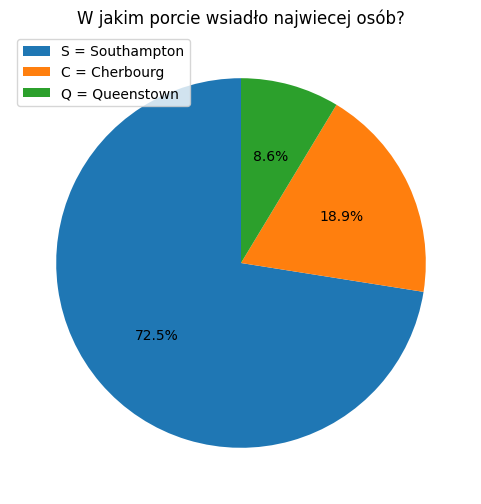

In [31]:
plt.figure(figsize=(6,6))
plt.pie(df["Embarked"].value_counts(), autopct="%1.1f%%", startangle=90)

# Dodanie legendy z opisem portów
plt.legend(
    labels=["S = Southampton", "C = Cherbourg", "Q = Queenstown"],
    loc="best"
)

plt.title("W jakim porcie wsiadło najwiecej osób?")
plt.show()

Najwięcej pasażerów wsiało w Southampton (72.5%)

####SibSp

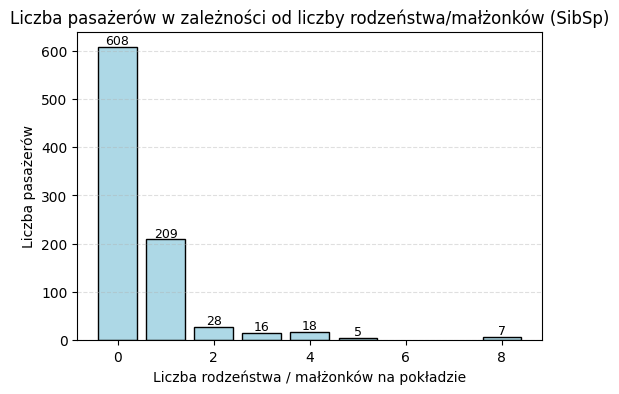

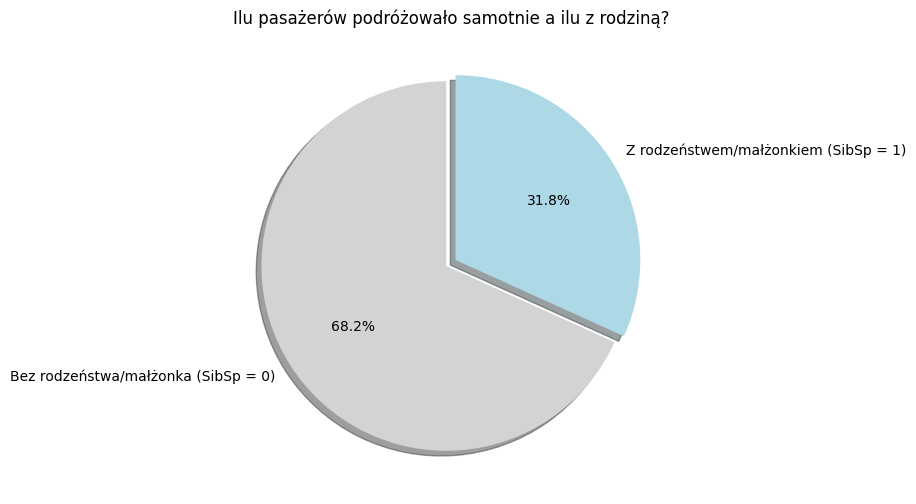

In [33]:
import matplotlib.pyplot as plt

sibsp_counts = df["SibSp"].value_counts().sort_index()

# Wykres słupkowy
plt.figure(figsize=(6,4))
plt.bar(sibsp_counts.index, sibsp_counts.values, color="lightblue", edgecolor="black")

plt.title("Liczba pasażerów w zależności od liczby rodzeństwa/małżonków (SibSp)")
plt.xlabel("Liczba rodzeństwa / małżonków na pokładzie")
plt.ylabel("Liczba pasażerów")
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Dodanie liczb nad słupkami
for i, val in enumerate(sibsp_counts.values):
    plt.text(sibsp_counts.index[i], val + 5, str(val), ha="center", fontsize=9)

plt.show()

import matplotlib.pyplot as plt

# dwie grupy: 0 = samotnie, 1 = z kimś
df["HasSibSp"] = df["SibSp"].apply(lambda x: 1 if x > 0 else 0)

# Zliczenie pasażerów w obu grupach
sibsp_groups = df["HasSibSp"].value_counts().sort_index()

# Etykiety i kolory
labels = ["Bez rodzeństwa/małżonka (SibSp = 0)", "Z rodzeństwem/małżonkiem (SibSp = 1)"]
colors = ["lightgray", "lightblue"]

# Wykres kołowy
plt.figure(figsize=(6,6))
plt.pie(
    sibsp_groups,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=(0.03, 0.03),
    shadow=True
)

plt.title("Ilu pasażerów podróżowało samotnie a ilu z rodziną?")
plt.show()


Bez rodzeństwa/małżonka (SibSp = 0) podróżowało większość pasażerów (ok. 68%)

Z rodzeństwem/małżonkiem (SibSp = 1) -> mniejszość (ok. 32%)

###Podsumowanie analizy jednowymiarowej
*   mężczyźni stanowili około 65% wszystkich pasażerów, a kobiety około 35%
*   większość pasażerów nie przeżyła, co odzwierciedla skalę tragedii
*  na pokładzie były osoby w każdym wieku — zarówno dzieci, jak i seniorzy. Dominowali dorośli w wieku 20–40 lat.
*  większość pasażerów zapłaciła mniej niż 50 £, tylko nieliczni mieli bilety bardzo drogie
*  najwięcej osób podróżowało w 3 klasie
*  większość pasażerów wsiadła w Southampton — głównym porcie wypłynięcia statku
*  większość osób podróżowała bez rodziny



###Analiza dwuwymiarowa

####Age vs Fare

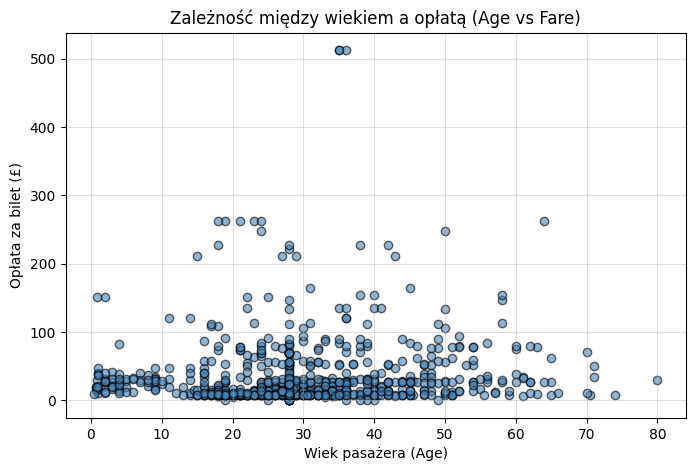

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["Age"], df["Fare"], c="steelblue", alpha=0.6, edgecolors="black")
plt.title("Zależność między wiekiem a opłatą (Age vs Fare)")
plt.xlabel("Wiek pasażera (Age)")
plt.ylabel("Opłata za bilet (£)")
plt.grid(alpha=0.4)
plt.show()


Brak silnej zależności – bilety o wysokich cenach były kupowane niezależnie od wieku

####Age vs Survived

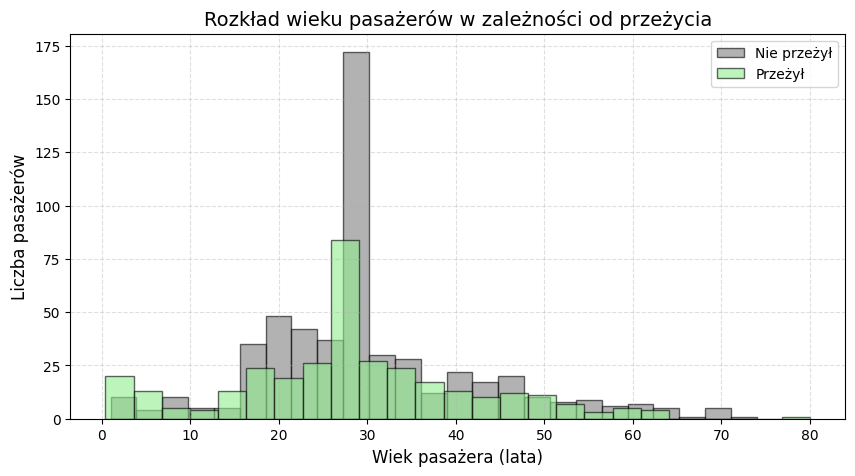

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df[df["Survived"] == 0]["Age"], bins=25, alpha=0.6, label="Nie przeżył", color="gray", edgecolor="black")
plt.hist(df[df["Survived"] == 1]["Age"], bins=25, alpha=0.6, label="Przeżył", color="lightgreen", edgecolor="black")
plt.title("Rozkład wieku pasażerów w zależności od przeżycia", fontsize=14)
plt.xlabel("Wiek pasażera (lata)", fontsize=12)
plt.ylabel("Liczba pasażerów", fontsize=12)
plt.legend()
plt.grid(alpha=0.4, linestyle="--")
plt.show()


/tmp/ipython-input-893699846.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_class = df.groupby(["Pclass", "AgeGroup"])["Survived"].mean().unstack()


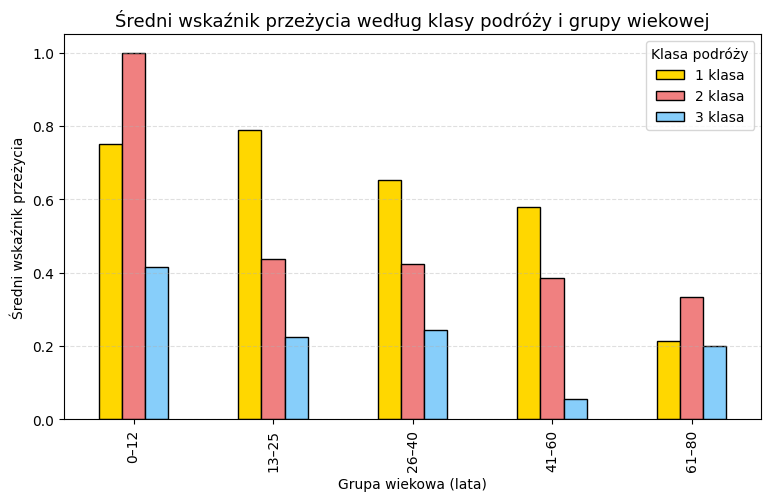

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# przedziały wiekowe
bins = [0, 12, 25, 40, 60, 80]
labels = ["0–12", "13–25", "26–40", "41–60", "61–80"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# Obliczenie średniego wskaźnika przeżycia dla każdej kombinacji (Pclass, AgeGroup)
survival_age_class = df.groupby(["Pclass", "AgeGroup"])["Survived"].mean().unstack()

# Wykres
survival_age_class.T.plot(kind="bar", figsize=(9,5), edgecolor="black",
                          color=["gold", "lightcoral", "lightskyblue"])

plt.title("Średni wskaźnik przeżycia według klasy podróży i grupy wiekowej", fontsize=13)
plt.xlabel("Grupa wiekowa (lata)")
plt.ylabel("Średni wskaźnik przeżycia")
plt.legend(title="Klasa podróży", labels=["1 klasa", "2 klasa", "3 klasa"])
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


####Pclass vs Survived

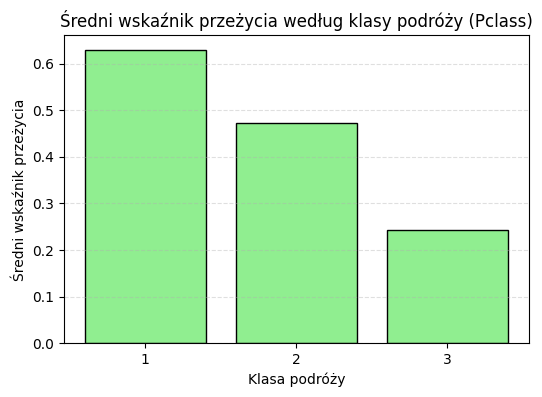

In [37]:
# średni wskaźnik przeżycia w każdej klasie
survival_by_class = df.groupby("Pclass")["Survived"].mean()

plt.figure(figsize=(6,4))
plt.bar(survival_by_class.index.astype(str), survival_by_class.values,
        color="lightgreen", edgecolor="black")

plt.title("Średni wskaźnik przeżycia według klasy podróży (Pclass)")
plt.xlabel("Klasa podróży")
plt.ylabel("Średni wskaźnik przeżycia")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


Pasażerowie 1 klasy mieli najwyższy wskaźnik przeżycia (ok. 63%),
a 3 klasy — najniższy (ok.24%).
Im wyższa klasa, tym większe szanse przeżycia.

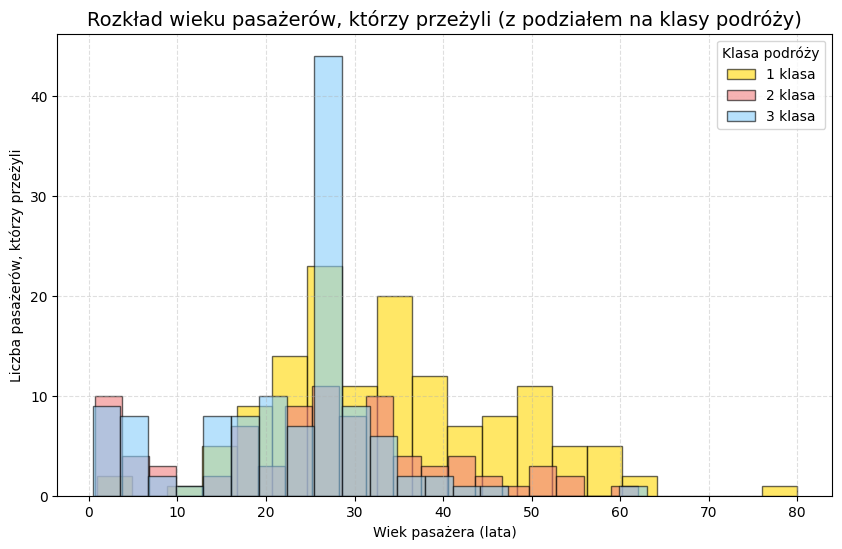

In [49]:
plt.figure(figsize=(10,6))

# Histogramy tylko dla tych, którzy przeżyli
plt.hist(df[df["Survived"] == 1]["Age"][df["Pclass"] == 1], bins=20, alpha=0.6, label="1 klasa", color="gold", edgecolor="black")
plt.hist(df[df["Survived"] == 1]["Age"][df["Pclass"] == 2], bins=20, alpha=0.6, label="2 klasa", color="lightcoral", edgecolor="black")
plt.hist(df[df["Survived"] == 1]["Age"][df["Pclass"] == 3], bins=20, alpha=0.6, label="3 klasa", color="lightskyblue", edgecolor="black")

plt.title("Rozkład wieku pasażerów, którzy przeżyli (z podziałem na klasy podróży)", fontsize=14)
plt.xlabel("Wiek pasażera (lata)")
plt.ylabel("Liczba pasażerów, którzy przeżyli")
plt.legend(title="Klasa podróży")
plt.grid(alpha=0.4, linestyle="--")
plt.show()


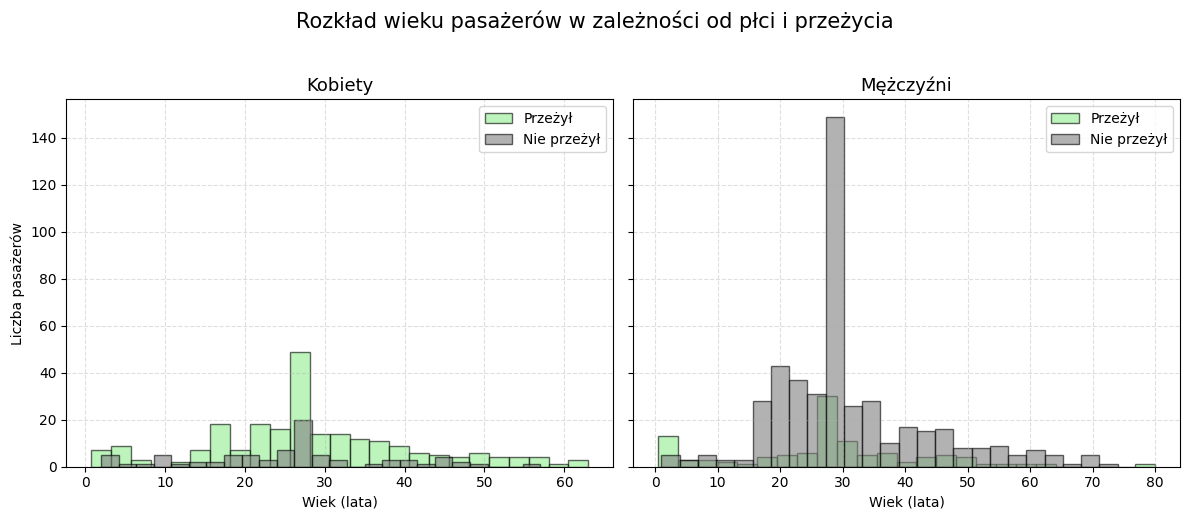

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
colors = {'Przeżył': 'lightgreen', 'Nie przeżył': 'gray'}

# --- Kobiety ---
axes[0].hist(df[(df["Sex"] == "female") & (df["Survived"] == 1)]["Age"], bins=25,
             alpha=0.6, color=colors['Przeżył'], label='Przeżył', edgecolor='black')
axes[0].hist(df[(df["Sex"] == "female") & (df["Survived"] == 0)]["Age"], bins=25,
             alpha=0.6, color=colors['Nie przeżył'], label='Nie przeżył', edgecolor='black')
axes[0].set_title("Kobiety", fontsize=13)
axes[0].set_xlabel("Wiek (lata)")
axes[0].set_ylabel("Liczba pasażerów")
axes[0].legend()
axes[0].grid(alpha=0.4, linestyle="--")

# --- Mężczyźni ---
axes[1].hist(df[(df["Sex"] == "male") & (df["Survived"] == 1)]["Age"], bins=25,
             alpha=0.6, color=colors['Przeżył'], label='Przeżył', edgecolor='black')
axes[1].hist(df[(df["Sex"] == "male") & (df["Survived"] == 0)]["Age"], bins=25,
             alpha=0.6, color=colors['Nie przeżył'], label='Nie przeżył', edgecolor='black')
axes[1].set_title("Mężczyźni", fontsize=13)
axes[1].set_xlabel("Wiek (lata)")
axes[1].legend()
axes[1].grid(alpha=0.4, linestyle="--")

fig.suptitle("Rozkład wieku pasażerów w zależności od płci i przeżycia", fontsize=15, y=1.03)
plt.tight_layout()
plt.show()


Kobiety miały większą szansę na ratunek, jednak było ich znacznie mniej niż mężczyzn na pokładzie.
W każdej grupie wiekowej im wyższa klasa podróży, tym większe szanse przeżycia.
Najbardziej narażeni byli dorośli mężczyźni z 3 klasy, a najlepiej chronione — dzieci i kobiety z 1 klasy

####Sex vs survived

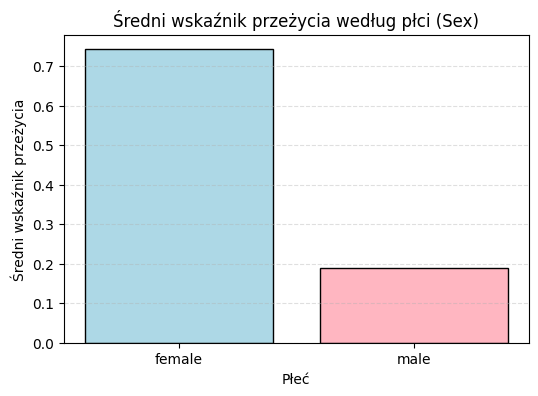

In [36]:
survival_by_sex = df.groupby("Sex")["Survived"].mean()

plt.figure(figsize=(6,4))
plt.bar(survival_by_sex.index, survival_by_sex.values,
        color=["lightblue", "lightpink"], edgecolor="black")

plt.title("Średni wskaźnik przeżycia według płci (Sex)")
plt.xlabel("Płeć")
plt.ylabel("Średni wskaźnik przeżycia")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


Kobiety miały znacznie większe szanse na przeżycie niż mężczyźni.
Średni wskaźnik przeżycia: ok. 75% kobiet vs 20% mężczyzn.

####Embarked vs Survived vs Pclass

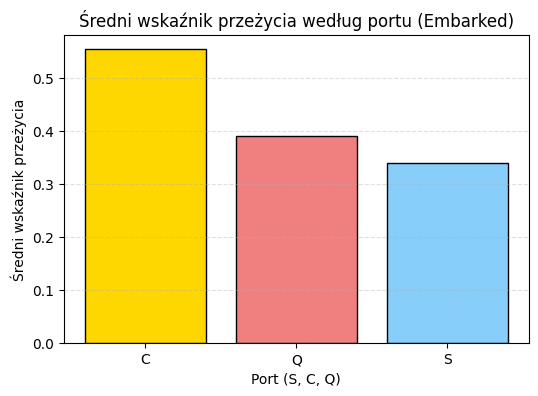

In [45]:
# Średni wskaźnik przeżycia dla każdego portu
survival_by_port = df.groupby("Embarked")["Survived"].mean()

plt.figure(figsize=(6,4))
plt.bar(survival_by_port.index, survival_by_port.values,
        color=["gold", "lightcoral", "lightskyblue"], edgecolor="black")

plt.title("Średni wskaźnik przeżycia według portu (Embarked)")
plt.xlabel("Port (S, C, Q)")
plt.ylabel("Średni wskaźnik przeżycia")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


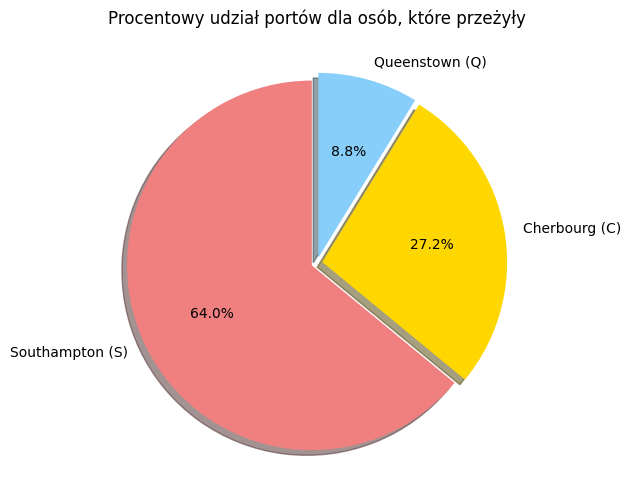

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrowanie tylko pasażerów, którzy przeżyli
survived_ports = df[df["Survived"] == 1]["Embarked"].value_counts()

# Etykiety i kolory
labels = ["Southampton (S)", "Cherbourg (C)", "Queenstown (Q)"]
colors = ["lightcoral", "gold", "lightskyblue"]

# Wykres kołowy
plt.figure(figsize=(6,6))
plt.pie(
    survived_ports,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=(0.03, 0.03, 0.03),
    shadow=True
)

plt.title("Procentowy udział portów dla osób, które przeżyły", fontsize=12)
plt.show()


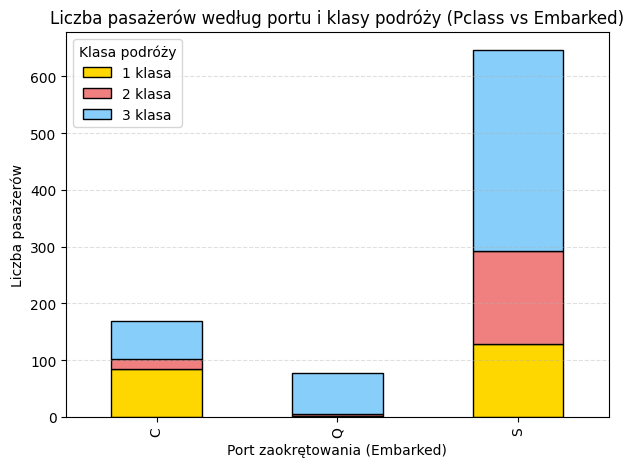

Liczba pasażerów według portu i klasy podróży:
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         129  164  353


In [41]:
# Zliczenie ilu pasażerów w danej klasie wsiadło w każdym porcie
pclass_embarked = df.groupby(["Embarked", "Pclass"]).size().unstack(fill_value=0)

# Wykres słupkowy skumulowany (stacked bar chart)
pclass_embarked.plot(kind="bar", stacked=True, color=["gold", "lightcoral", "lightskyblue"], edgecolor="black", figsize=(7,5))

plt.title("Liczba pasażerów według portu i klasy podróży (Pclass vs Embarked)")
plt.xlabel("Port zaokrętowania (Embarked)")
plt.ylabel("Liczba pasażerów")
plt.legend(title="Klasa podróży", labels=["1 klasa", "2 klasa", "3 klasa"])
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

# Dodatkowo wyświetlenie tabeli
print("Liczba pasażerów według portu i klasy podróży:")
print(pclass_embarked)


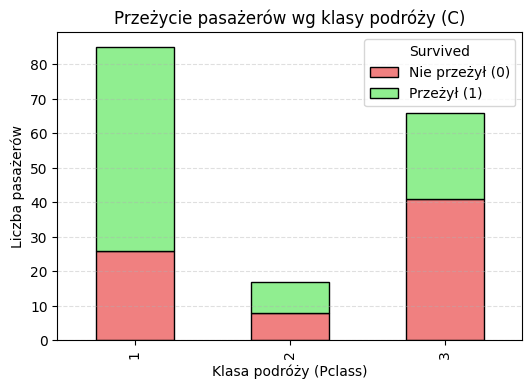

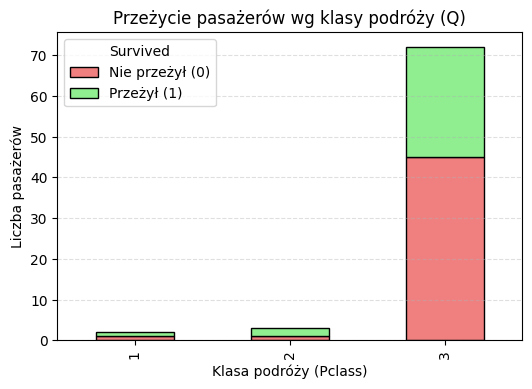

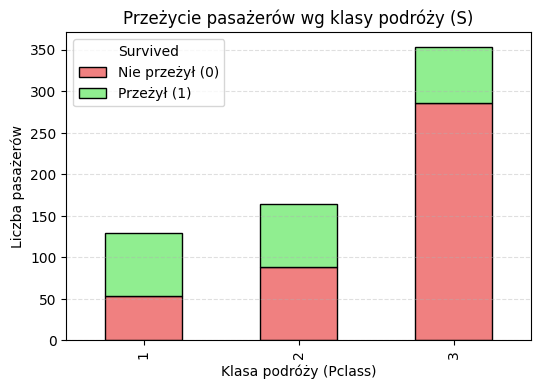

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Grupujemy dane: port zaokrętowania, klasa, przeżycie
embarked_pclass_survived = df.groupby(["Embarked", "Pclass", "Survived"]).size().unstack(fill_value=0)

# Sumujemy dla przeżyłych (1) i nieprzeżyłych (0)
# Dla czytelności – osobno dla każdego portu
for port in embarked_pclass_survived.index.levels[0]:
    subset = embarked_pclass_survived.loc[port]
    subset.plot(
        kind="bar",
        stacked=True,
        color=["lightcoral", "lightgreen"],
        edgecolor="black",
        figsize=(6,4)
    )
    plt.title(f"Przeżycie pasażerów wg klasy podróży ({port})")
    plt.xlabel("Klasa podróży (Pclass)")
    plt.ylabel("Liczba pasażerów")
    plt.legend(title="Survived", labels=["Nie przeżył (0)", "Przeżył (1)"])
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.show()


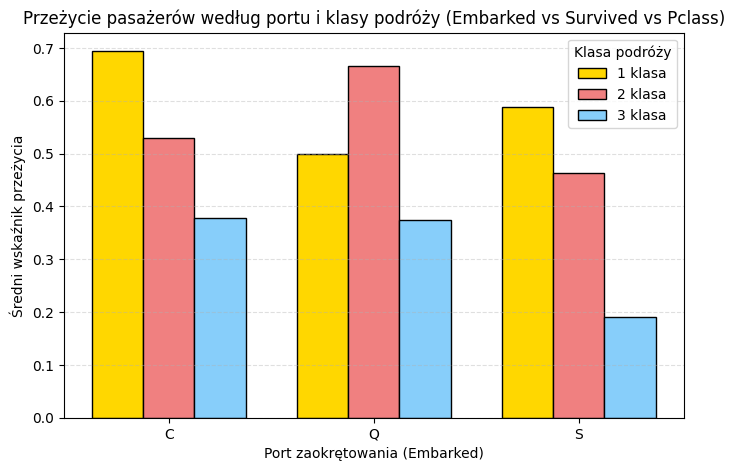

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Grupowanie i obliczanie średniego wskaźnika przeżycia w podziale na port i klasę
survival_summary = df.groupby(["Embarked", "Pclass"])["Survived"].mean().unstack()

# Etykiety portów i klasy
ports = survival_summary.index
classes = survival_summary.columns

# Ustawienie pozycji słupków (dla rozdzielenia klas)
x = np.arange(len(ports))
width = 0.25

# Wykres grupowy
plt.figure(figsize=(8,5))
plt.bar(x - width, survival_summary[1], width, label="1 klasa", color="gold", edgecolor="black")
plt.bar(x, survival_summary[2], width, label="2 klasa", color="lightcoral", edgecolor="black")
plt.bar(x + width, survival_summary[3], width, label="3 klasa", color="lightskyblue", edgecolor="black")

# Oś i opis
plt.xticks(x, ports)
plt.ylabel("Średni wskaźnik przeżycia")
plt.xlabel("Port zaokrętowania (Embarked)")
plt.title("Przeżycie pasażerów według portu i klasy podróży (Embarked vs Survived vs Pclass)")
plt.legend(title="Klasa podróży")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()


Najwięcej ocalałych pochodziło z Southampton, ale procentowo (względem liczby wsiadających) największe szanse mieli pasażerowie z Cherbourga. Mimo że większość pasażerów wsiadła w Southampton, to z Cherbourga pochodziła większa część osób z 1 klasy,
czyli tych, którzy mieli wyższe szanse na przeżycie dzięki lepszym warunkom i dostępowi do łodzi ratunkowych.

####Fare vs Pclass vs Survived

<Figure size 800x500 with 0 Axes>

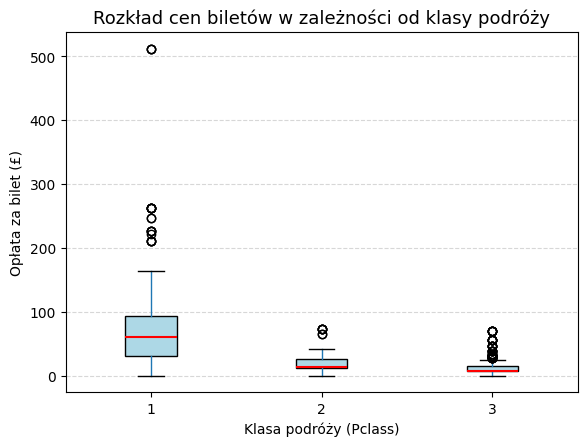

In [57]:
import matplotlib.pyplot as plt

# Wykres pudełkowy: Fare vs Pclass
plt.figure(figsize=(8,5))
df.boxplot(column="Fare", by="Pclass", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue"),
           medianprops=dict(color="red", linewidth=1.5))

plt.title("Rozkład cen biletów w zależności od klasy podróży", fontsize=13)
plt.suptitle("")  # usuwa domyślny tytuł "Fare by Pclass"
plt.xlabel("Klasa podróży (Pclass)")
plt.ylabel("Opłata za bilet (£)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

1 klasa: najwyższe ceny i największe zróżnicowanie — od ok. 30 £ do ponad 500 £.

2 klasa: umiarkowane ceny, większość między 10 a 50 £.

3 klasa: bilety najtańsze, większość poniżej 20 £.


<Figure size 700x500 with 0 Axes>

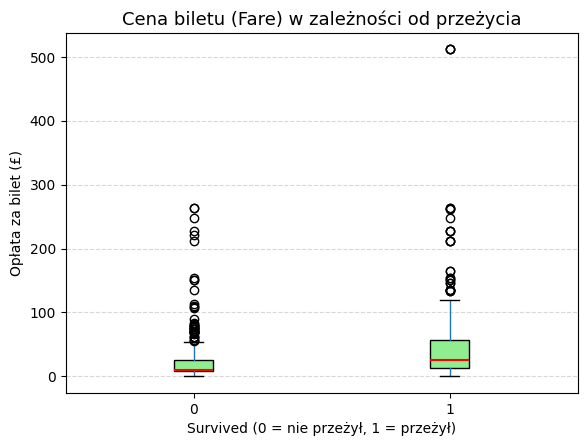

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
df.boxplot(column="Fare", by="Survived", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightgreen"),
           medianprops=dict(color="red", linewidth=1.5))

plt.title("Cena biletu (Fare) w zależności od przeżycia", fontsize=13)
plt.suptitle("")
plt.xlabel("Survived (0 = nie przeżył, 1 = przeżył)")
plt.ylabel("Opłata za bilet (£)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


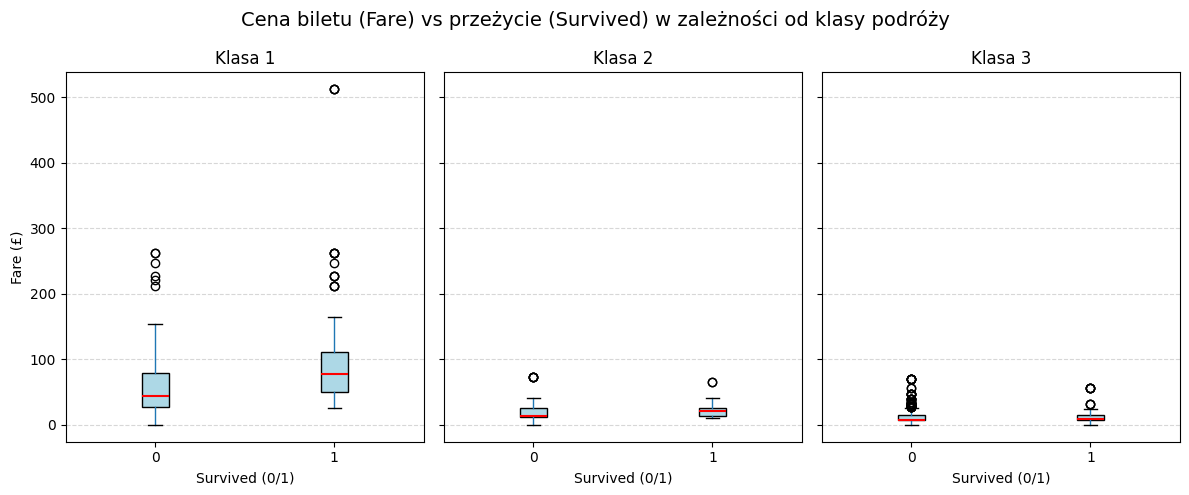

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(12,5), sharey=True)

for i, pclass in enumerate(sorted(df["Pclass"].unique())):
    subset = df[df["Pclass"] == pclass]
    subset.boxplot(column="Fare", by="Survived", grid=False, patch_artist=True,
                   ax=axes[i], boxprops=dict(facecolor="lightblue"),
                   medianprops=dict(color="red", linewidth=1.5))
    axes[i].set_title(f"Klasa {pclass}")
    axes[i].set_xlabel("Survived (0/1)")
    axes[i].set_ylabel("Fare (£)" if i == 0 else "")
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

plt.suptitle("Cena biletu (Fare) vs przeżycie (Survived) w zależności od klasy podróży", fontsize=14)
plt.tight_layout()
plt.show()


Pasażerowie, którzy przeżyli (Survived = 1), mieli zazwyczaj droższe bilety — ich mediany cen są wyraźnie wyższe niż u osób, które zginęły.
Wskazuje to, że status ekonomiczny (klasa podróży) miał wpływ na szanse przeżycia.
W 1 klasie większość pasażerów miała wysokie ceny, a duży odsetek z nich przeżył.

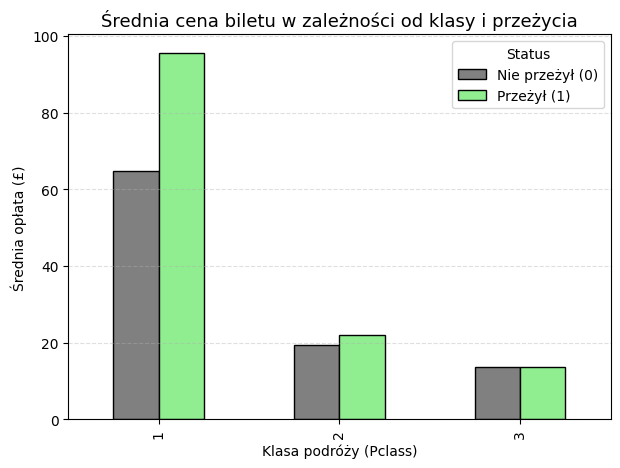

In [60]:
import matplotlib.pyplot as plt

# Obliczenie średnich cen dla kombinacji (Pclass, Survived)
avg_fare = df.groupby(["Pclass", "Survived"])["Fare"].mean().unstack()

# Wykres słupkowy
avg_fare.plot(kind="bar", color=["gray", "lightgreen"], edgecolor="black", figsize=(7,5))

plt.title("Średnia cena biletu w zależności od klasy i przeżycia", fontsize=13)
plt.xlabel("Klasa podróży (Pclass)")
plt.ylabel("Średnia opłata (£)")
plt.legend(["Nie przeżył (0)", "Przeżył (1)"], title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


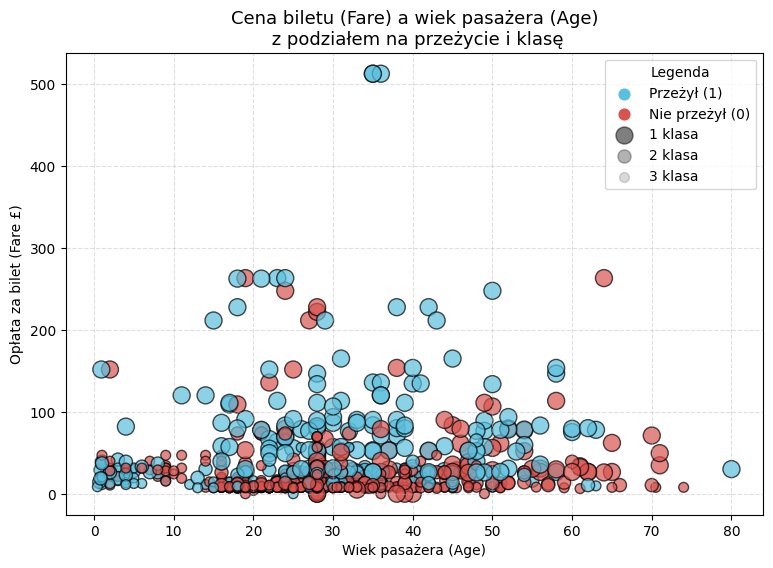

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

# Nowa, wyraźniejsza paleta kolorów
# czerwony = nie przeżył, niebieski = przeżył
colors = df["Survived"].map({0: "#d9534f", 1: "#5bc0de"})

# rozmiar punktu zależny od klasy
sizes = df["Pclass"].map({1: 150, 2: 90, 3: 50})

plt.scatter(df["Age"], df["Fare"],
            c=colors, s=sizes,
            edgecolor="black", alpha=0.7)

plt.title("Cena biletu (Fare) a wiek pasażera (Age)\n z podziałem na przeżycie i klasę", fontsize=13)
plt.xlabel("Wiek pasażera (Age)")
plt.ylabel("Opłata za bilet (Fare £)")
plt.grid(alpha=0.4, linestyle="--")

# --- Legenda ---
plt.scatter([], [], c="#5bc0de", s=60, label="Przeżył (1)")
plt.scatter([], [], c="#d9534f", s=60, label="Nie przeżył (0)")
plt.scatter([], [], c="black", s=150, label="1 klasa", alpha=0.5)
plt.scatter([], [], c="black", s=90, label="2 klasa", alpha=0.3)
plt.scatter([], [], c="black", s=50, label="3 klasa", alpha=0.15)

plt.legend(title="Legenda", loc="upper right", frameon=True)
plt.show()


Osoby z 1 klasy (większe punkty) miały wyższe ceny biletów i częściej przeżywały (niebieskie punkty).

Pasażerowie z 3 klasy (małe punkty) płacili mniej i rzadziej przeżywali (czerwone punkty).

Wysoka cena biletu i przynależność do wyższej klasy podróży były wyraźnie powiązane z większym prawdopodobieństwem przeżycia.

###Podsumowanie analizy dwuwymiarowej


Płeć i klasa podróży miały decydujące znaczenie dla przeżycia – kobiety i dzieci z 1 klasy miały największe szanse na ratunek.

Wysoka opłata za bilet oraz posiadanie kabiny były powiązane z większym prawdopodobieństwem przeżycia.

Pasażerowie z Cherbourga (C) mieli najwyższy średni wskaźnik przeżycia, ponieważ wsiadali tam głównie przedstawiciele 1 klasy.

Zależność Age vs Survived pokazała, że dzieci miały większe szanse niż dorośli mężczyźni, szczególnie w niższych klasach.

Analiza Fare vs Pclass vs Survived potwierdziła, że klasa podróży była pośrednim czynnikiem wpływającym na cenę biletu, a tym samym na szanse przeżycia.

##Macierz korelacji

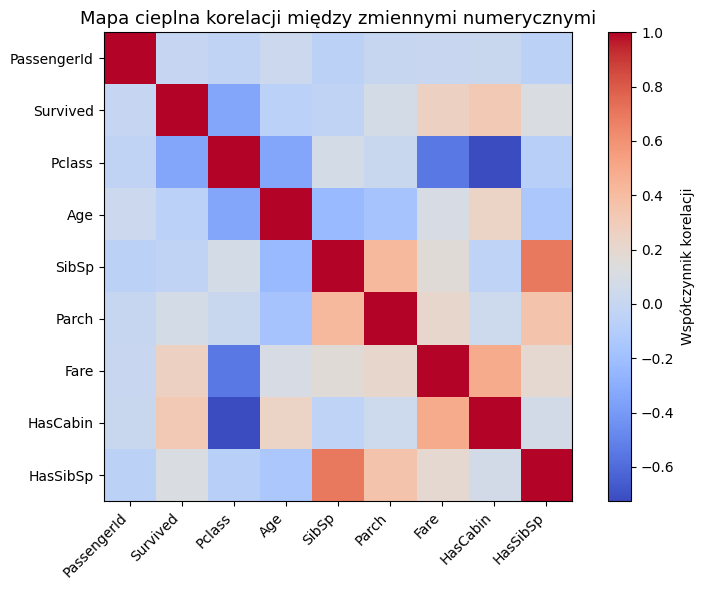

📘 Korelacje między zmiennymi numerycznymi:
             PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare  \
PassengerId         1.00     -0.01   -0.04  0.03  -0.06  -0.00  0.01   
Survived           -0.01      1.00   -0.34 -0.06  -0.04   0.08  0.26   
Pclass             -0.04     -0.34    1.00 -0.34   0.08   0.02 -0.55   
Age                 0.03     -0.06   -0.34  1.00  -0.23  -0.17  0.10   
SibSp              -0.06     -0.04    0.08 -0.23   1.00   0.41  0.16   
Parch              -0.00      0.08    0.02 -0.17   0.41   1.00  0.22   
Fare                0.01      0.26   -0.55  0.10   0.16   0.22  1.00   
HasCabin            0.02      0.32   -0.73  0.24  -0.04   0.04  0.48   
HasSibSp           -0.05      0.12   -0.08 -0.14   0.70   0.36  0.19   

             HasCabin  HasSibSp  
PassengerId      0.02     -0.05  
Survived         0.32      0.12  
Pclass          -0.73     -0.08  
Age              0.24     -0.14  
SibSp           -0.04      0.70  
Parch            0.04      0.36 

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Obliczamy korelacje tylko dla kolumn numerycznych
corr = df.corr(numeric_only=True)

# Tworzymy mapę cieplną (heatmap)
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Współczynnik korelacji")
plt.title("Mapa cieplna korelacji między zmiennymi numerycznymi", fontsize=13)

# Oznaczamy osie
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)

# Siatka dla lepszej czytelności
plt.grid(False)
plt.tight_layout()
plt.show()

# Wyświetlenie samej tabeli korelacji
print("📘 Korelacje między zmiennymi numerycznymi:")
print(corr.round(2))


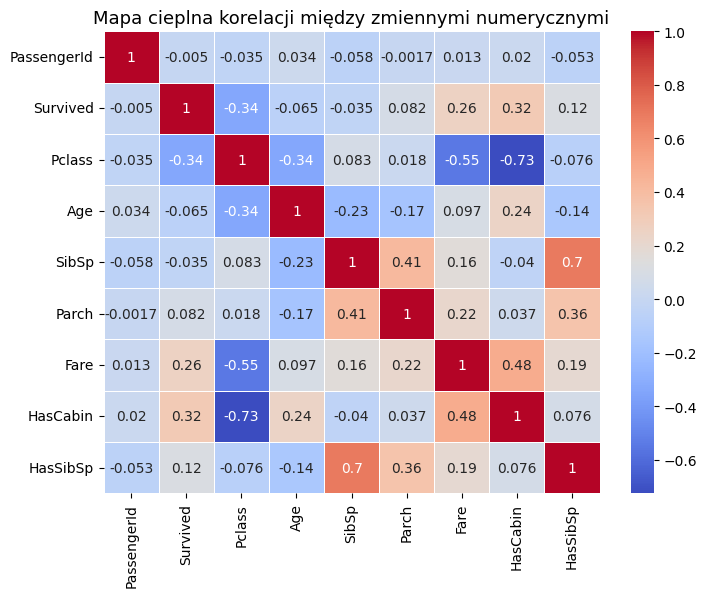

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa cieplna korelacji między zmiennymi numerycznymi", fontsize=13)
plt.show()


Mapa cieplna potwierdza, że status ekonomiczny był kluczowym czynnikiem w szansach na ratunek.

*  Pclass i Fare: silna korelacja ujemna (~ –0.55)
-> im wyższa klasa (1 = luksus), tym droższy bilet.

*  Pclass i Survived: umiarkowana korelacja ujemna (~ –0.34)
-> pasażerowie z wyższej klasy częściej przeżywali.

*   Fare i Survived: dodatnia korelacja (~ 0.26)
-> wyższa opłata (lepsza klasa) zwiększała szanse przeżycia.

*   Age prawie nie koreluje z przeżyciem (~ –0.08)
-> wiek sam w sobie nie był kluczowy, bardziej liczyła się klasa i płeć.

##Wnioski Anlizy wartosci odstajacych

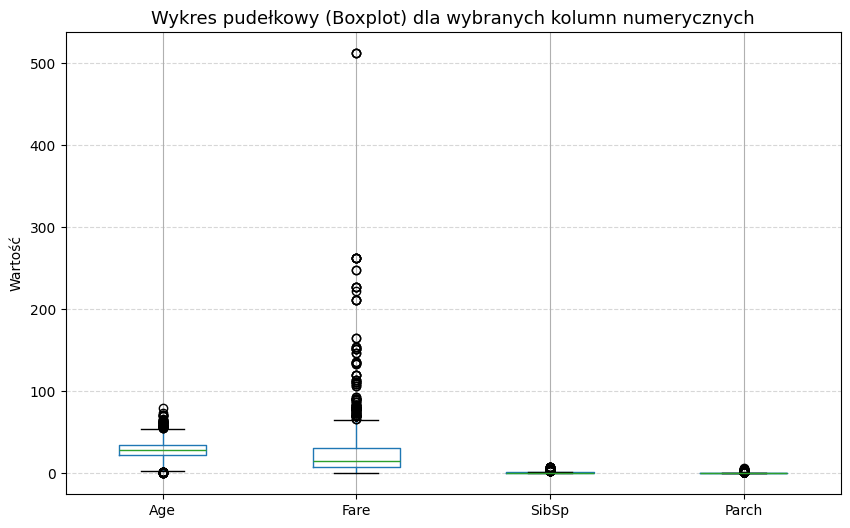

In [53]:
import matplotlib.pyplot as plt

# --- Wykres pudełkowy (boxplot) dla kluczowych kolumn numerycznych ---
plt.figure(figsize=(10,6))
df[["Age", "Fare", "SibSp", "Parch"]].boxplot()
plt.title("Wykres pudełkowy (Boxplot) dla wybranych kolumn numerycznych", fontsize=13)
plt.ylabel("Wartość")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


In [54]:
# Funkcja do znalezienia odstających wartości
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Kolumna '{column}': {len(outliers)} wartości odstających")
    print(f"Zakres: {lower_bound:.2f} – {upper_bound:.2f}")
    print()
    return outliers

# Sprawdzenie wybranych kolumn
for col in ["Age", "Fare", "SibSp", "Parch"]:
    detect_outliers_iqr(col)


Kolumna 'Age': 66 wartości odstających
Zakres: 2.50 – 54.50

Kolumna 'Fare': 116 wartości odstających
Zakres: -26.72 – 65.63

Kolumna 'SibSp': 46 wartości odstających
Zakres: -1.50 – 2.50

Kolumna 'Parch': 213 wartości odstających
Zakres: 0.00 – 0.00




Wykres pudełkowy pokazuje, że w kolumnie Age pojawiają się starsze osoby (powyżej 70 lat), co jest zgodne z rzeczywistością.
W kolumnie Fare widać kilka bardzo wysokich cen biletów – dotyczą pasażerów 1 klasy.
W kolumnach SibSp i Parch większość pasażerów podróżowała samotnie, a pojedyncze przypadki dużych rodzin stanowią naturalne odstępstwa.

Analiza metodą IQR wykazała:

*  66 wartości odstających w Age (osoby powyżej 54 lat),

*  116 w Fare (opłaty powyżej 65 £),

*  46 w SibSp (więcej niż 2 rodzeństwa/małżonków),

*  213 w Parch (rodziny z dziećmi powyżej typowego zakresu).

Dane nie zawierają nienaturalnych błędów – odstępstwa są logiczne i zgodne z kontekstem.
Nie ma potrzeby usuwać wartości odstających, jednak:

można zastosować transformację logarytmiczną dla kolumny Fare, aby zmniejszyć wpływ bardzo wysokich wartości,

warto dodać zmienną binarną LargeFamily dla rodzin liczących pięć lub więcej osób,

pozostałe dane można pozostawić bez zmian.

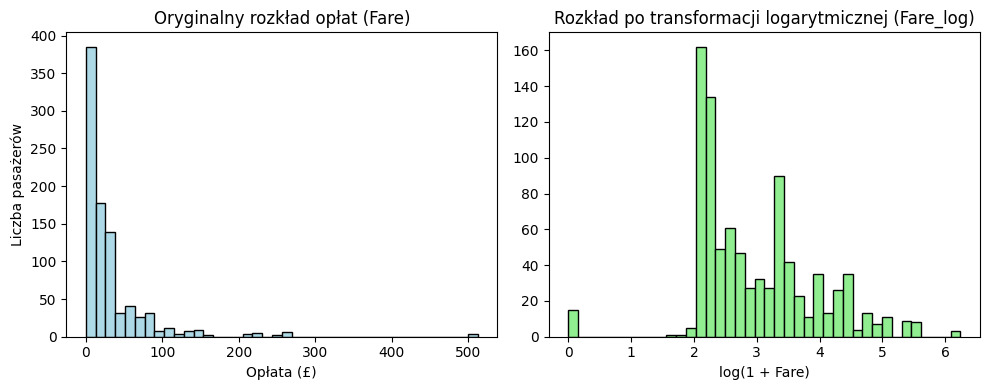

Przykładowe kolumny po przekształceniach:
      Fare  Fare_log  SibSp  Parch  FamilySize  LargeFamily
0   7.2500  2.110213      1      0           2            0
1  71.2833  4.280593      1      0           2            0
2   7.9250  2.188856      0      0           1            0
3  53.1000  3.990834      1      0           2            0
4   8.0500  2.202765      0      0           1            0
5   8.4583  2.246893      0      0           1            0
6  51.8625  3.967694      0      0           1            0
7  21.0750  3.094446      3      1           5            1
8  11.1333  2.495954      0      2           3            0
9  30.0708  3.436268      1      0           2            0

Liczba dużych rodzin (≥5 osób): 62


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Transformacja logarytmiczna dla kolumny Fare ---
df["Fare_log"] = np.log1p(df["Fare"])  # log(1 + Fare)

# Porównanie rozkładu przed i po transformacji
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["Fare"], bins=40, color="lightblue", edgecolor="black")
plt.title("Oryginalny rozkład opłat (Fare)")
plt.xlabel("Opłata (£)")
plt.ylabel("Liczba pasażerów")

plt.subplot(1,2,2)
plt.hist(df["Fare_log"], bins=40, color="lightgreen", edgecolor="black")
plt.title("Rozkład po transformacji logarytmicznej (Fare_log)")
plt.xlabel("log(1 + Fare)")
plt.tight_layout()
plt.show()

# --- 2. Dodanie kolumny LargeFamily ---
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["LargeFamily"] = df["FamilySize"].apply(lambda x: 1 if x >= 5 else 0)

# --- 3. Sprawdzenie efektu ---
print("Przykładowe kolumny po przekształceniach:")
print(df[["Fare", "Fare_log", "SibSp", "Parch", "FamilySize", "LargeFamily"]].head(10))

print("\nLiczba dużych rodzin (≥5 osób):", df["LargeFamily"].sum())


#Podsumowanie wyników analizy ksploracyjnej danych (EDA)

## **1. Struktura i jakość danych**

- Zbiór obejmuje **891 pasażerów**.  
- Po uzupełnieniu braków w kolumnach **Age**, **Embarked** i **Cabin** dane są kompletne i nie zawierają duplikatów.  
- Utworzono dodatkową kolumnę **HasCabin**, informującą, czy pasażer miał przypisaną kabinę.  
- Dane zostały przygotowane do dalszych analiz.

---

## **2. Charakterystyka pasażerów**

- Większość (**ok. 55%**) podróżowała w **3 klasie**.  
- Najwięcej osób wsiadło w **Southampton (ok. 72%)**.  
- **Mężczyźni stanowili 65%**, a **kobiety 35%** pasażerów.  
- **Średni wiek** pasażerów wynosił około **30 lat** – dominowali dorośli w wieku 20–40 lat.  
- Większość osób podróżowała **samotnie lub w małych grupach rodzinnych**.

---

## **3. Przeżycie**

- Katastrofę przeżyło około **38% pasażerów**, natomiast **62% zginęło**.  
- Najwyższy odsetek przeżycia dotyczył **kobiet i dzieci z 1 klasy**.  
- Prawdopodobieństwo przeżycia było wyraźnie niższe wśród **mężczyzn z 3 klasy**.

---

## **4. Zauważone zależności**

- **Klasa podróży** miała kluczowy wpływ na przeżycie – im wyższa klasa, tym większe szanse ratunku.  
- **Kobiety** przeżywały znacznie częściej niż mężczyźni (**ok. 75% vs 20%**).  
- **Wyższa cena biletu (Fare)** była związana z **większym prawdopodobieństwem przeżycia**.  
- **Pasażerowie z Cherbourga (C)** mieli wyższy wskaźnik przeżycia niż ci z Southampton.  
- **Wiek** nie był samodzielnym czynnikiem decydującym, ale **dzieci** miały relatywnie większe szanse na ratunek.

---

## **5. Wartości odstające i przekształcenia**

- Wartości odstające w kolumnch **Fare** i **Age** są uzasadnione i nie wymagają usunięcia.  
- Zastosowano **transformację logarytmiczną** dla zmiennej *Fare*, aby zmniejszyć wpływ bardzo wysokich wartości.  
- Utworzono kolumnę **LargeFamily** (rodziny ≥ 5 osób), ponieważ liczebność rodziny mogła mieć znaczenie dla przeżycia.  
- Pozostałe dane pozostawiono bez zmian.

---

## **6. Korelacje między zmiennymi**

Najsilniejsze zależności zaobserwowano pomiędzy:  
- **Pclass vs Fare** – korelacja ujemna (~ –0.55): im wyższa klasa (1 = luksus), tym droższy bilet.  
- **Fare vs Survived** – korelacja dodatnia (~ 0.26): wyższa opłata zwiększała szansę przeżycia.  
- **Pclass vs Survived** – korelacja ujemna (~ –0.34): niższa klasa wiązała się z mniejszymi szansami przeżycia.  
- **HasCabin vs Survived** – korelacja dodatnia: osoby z kabiny częściej przeżyły.  
- **Age vs Survived** – bardzo słaba korelacja (~ –0.08): wiek nie był istotnym czynnikiem sam w sobie.

---

## **7. Wnioski końcowe**

Największy wpływ na przeżycie miały czynniki **społeczne i ekonomiczne**:  
**płeć, klasa podróży, cena biletu oraz port.**  

Zmienne, które warto wykorzystać w dalszej analizie predykcyjnej:  
**Sex, Pclass, Fare, Embarked, HasCabin, LargeFamily.**

---
